In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# plotting
plt.rcParams.update({'font.size': 16})

**Exercise 2.4**

In [2]:
# random Gamma distribution
k = 5
theta = 1/5
gammas = np.random.gamma(shape=k, scale=theta, size=10000)

/home/ndoyle/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


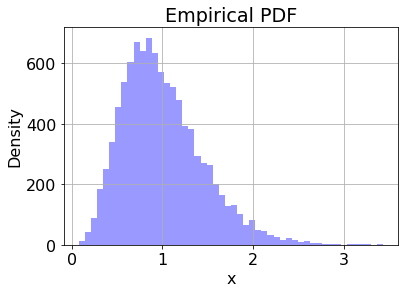

In [3]:
sns.distplot(gammas, color='b', kde=False)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Empirical PDF')
plt.grid()

In [4]:
# samples
n = 50
Nexp = 5000
Xns = np.zeros(Nexp)

for i in range(Nexp):
    np.random.shuffle(gammas)

    sample = gammas[:n]
    Xns[i] = sample.mean()

# true mean and variance
mu = gammas.mean()
sigma = np.sqrt(n/(n-1))*gammas.std()

# CLT
Zns = np.random.normal(mu,sigma/np.sqrt(n),size=Nexp)

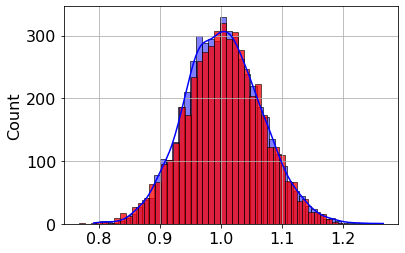

In [5]:
sns.histplot(Xns,color='b',kde=True)
sns.histplot(Zns,color='r')
plt.grid()

**Exercise 2.5**

In [6]:
from statistics import variance

n = 100
U = np.random.uniform(size=n)

# sample mean
Ubar = U.mean()

# sample variance (biased)
sb = np.sum((U - Ubar*np.ones(n))**2)/n

# sample variance (unbiased)
su = n/(n-1)*sb

# inbuilt variances
sigma1 = U.std()**2
sigma2 = np.var(U)
sigma3 = variance(U)

# true variance
var = 1/12*(1 - 0)**2

print('sample mean: ',Ubar)
print('sample variance (biased): ',sb)
print('sample variance (unbiased): ',su)
print('inbuilt variance 1: ',sigma1)
print('inbuilt variance 2: ',sigma2)
print('inbuilt variance 3: ',sigma3)
print('true variance: ',var)

sample mean:  0.4999657977904311
sample variance (biased):  0.08341038280948611
sample variance (unbiased):  0.08425291192877385
inbuilt variance 1:  0.08341038280948612
inbuilt variance 2:  0.08341038280948611
inbuilt variance 3:  0.08425291192877384
true variance:  0.08333333333333333


**Exercise 2.6**

In [7]:
# normal distribution
normals = np.random.normal(size=10000)

# samples
n = 50
Nexp = 5000
mus = np.zeros(Nexp)
sigmas = np.zeros(Nexp)

for i in range(Nexp):
    np.random.shuffle(normals)

    sample = normals[:n]
    mus[i] = sample.mean()
    sigmas[i] = variance(sample)

# true mean and variance
mu = normals.mean()
sigma = variance(normals)/n
print(mu)
print(sigma)

-0.009609437840690594
0.019935184495012817


<AxesSubplot:ylabel='Count'>

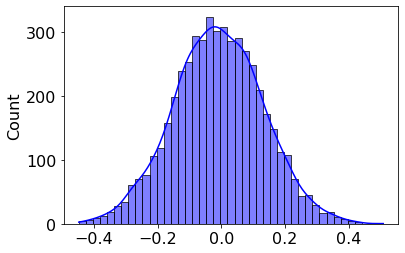

In [8]:
# sample mean
sns.histplot(mus,color='b',kde=True)

<AxesSubplot:ylabel='Count'>

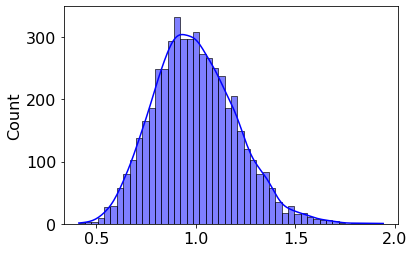

In [9]:
# unbiased sample variance
sns.histplot(sigmas,color='b',kde=True)

**Exercise 2.7**

In [10]:
prices = pd.read_csv('./pp-2022.csv', header=None, usecols=[1])
ser = prices[1]
prices = ser.to_numpy()
prices = prices[prices < 2e6]
prices

array([160000, 245000, 165500, ..., 635000, 895000, 250000])

In [11]:
# mean and standard deviation
n = len(prices)
mu = prices.mean()
sigma = np.sqrt(n/(n-1))*prices.std()
print(n)
print(mu)
print(sigma)

452711
334989.0888204616
256834.14698420305


In [12]:
print(prices.min())
print(prices.argmin())

100
51400


In [13]:
# samples
samsize = 500
Nexp = 5000
mus = np.zeros(Nexp)
sigmas = np.zeros(Nexp)

for i in range(Nexp):
    np.random.shuffle(prices)

    sample = prices[:samsize]
    mus[i] = sample.mean()
    sigmas[i] = np.sqrt(samsize/(samsize-1))*sample.std()

# normal
norms = np.random.normal(mu,sigma/np.sqrt(samsize),size=Nexp)

In [14]:
norms

array([344219.5590704 , 354054.54439299, 337792.23418595, ...,
       350411.16939169, 319900.92588951, 321973.95706868])

<AxesSubplot:ylabel='Count'>

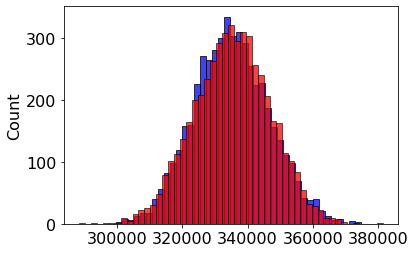

In [15]:
# sample mean
sns.histplot(mus,color='b')
sns.histplot(norms,color='r')

<AxesSubplot:ylabel='Count'>

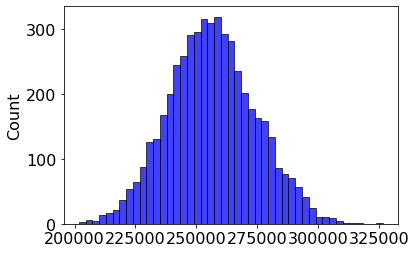

In [16]:
# unbiased sample variance
sns.histplot(sigmas,color='b')

**Exercise 2.8**

(-1.0, 2000000.0)

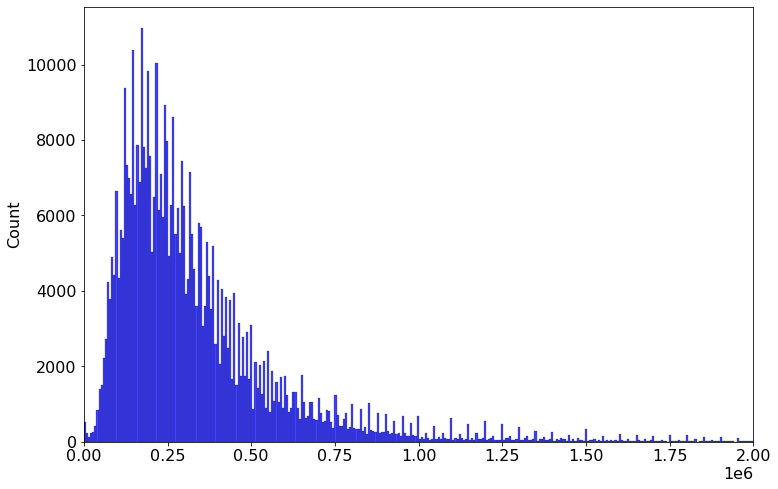

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(prices, color='b')
plt.xlim([-1,2e6])

It looks like a Gamma distribution. From above,

$$(\mu, \sigma) = (334989, 256834)$$ 

In contrast, a Gamma distribution with shape $k$ and scale $\theta$ has mean $\mu = k \theta$ and standard deviation $\sigma = \sqrt{k} \theta$. Thus,

$$\sqrt{k} = \frac{\mu}{\sigma}$$

$$\theta = \frac{\sigma^2}{\mu}$$

1.7012016478258323
196913.2167539245


(-1.0, 2000000.0)

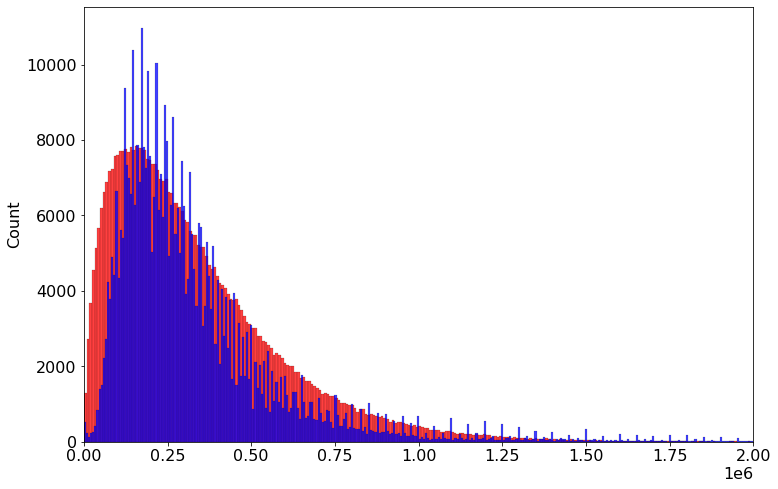

In [18]:
k = (mu/sigma)**2
theta = sigma**2/mu
print(k)
print(theta)
G = np.random.gamma(shape=k, scale=theta, size=n)

plt.figure(figsize=(12,8))
sns.histplot(G,color='r')
sns.histplot(prices, color='b')
plt.xlim([-1,2e6])

**Trend:** housing price estimates often rounded to nearest 5,000 or 10,000